# Student Performance Indicator

### Life Cycle of a Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis (EDA)
- Data Pre-Processing
- Model Training
- Choose Best Model

### 1) Problem Statement

This project aims to understand and predict student performances (exam scores) using known details about students such as **Gender**, **Ethnicity**, **Parental level of education**, **Lunch** and **Test Preparation Course**.

### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

- The dataset contains 8 columns and 1000 rows


### 2.1) Import Data and Required Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# Check the shape of the data
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 1000
Number of columns: 8


In [9]:
df["test_preparation_course"].unique()

array(['none', 'completed'], dtype=object)

### 2.2) Dateset Information

- **gender**: Student gender -> (Male/Female)
- **race_ethnicity**: Race/Ethnicity of Student -> (Group A,B,C,D,E)
- **parental_level_of_education**: Highest level of education achieved by the student's parents -> (bachelor's degree, some college, master's degree,
       associate's degree, high school, some high school)

- **lunch**: What lunch did the student have before the test -> (standard or free/reduced)
- **test_preparation_course**: Did the student complete a test preparation course prior to the test? -> (none/completed)
- **math score**
- **reading score**
- **writing score**

### 3) Data Checks to Perform

- Check for missing data
- Check for duplicate records
- Check data types
- Check number of unique values for each column
- Check statistics of dataset
- Check various categories present in the categorical columns

#### 3.1) Check for Missing Data

In [17]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the dateset

#### 3.2) Check for Duplicate Records

In [27]:
int(df.duplicated().sum())

0

There are no duplicates in the dateset

#### 3.3) Check Data Types

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4) Checking the Number of Unique Values in Each Column

In [30]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5) Check the Statistics of the Dateset

In [33]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights from Stats
- We can see that the average score for math, reading and writing tests are quite close, ranging between ~66.09 and ~69.17
- The standard deviations for the three test scores are also very similar, ranging between ~14.60 and ~15.20
- The mimimum test score is highest for the reading test (17.0) then writing test (10.0) and then math (0.0)
- At least one student from each test achieved full marks (100.0)

#### 3.6) Exploring Data

In [35]:
print("Categories in 'gender' column:")
print(df["gender"].unique())
print("\n")

print("Categories in 'race/ethnicity' column:")
print(df["race_ethnicity"].unique())
print("\n")

print("Categories in 'parental level of education' column:")
print(df["parental_level_of_education"].unique())
print("\n")

print("Categories in 'lunch' column:")
print(df["lunch"].unique())
print("\n")

print("Categories in 'test preparation course' column:")
print(df["test_preparation_course"].unique())


Categories in 'gender' column:
['female' 'male']


Categories in 'race/ethnicity' column:
['group B' 'group C' 'group A' 'group D' 'group E']


Categories in 'parental level of education' column:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categories in 'lunch' column:
['standard' 'free/reduced']


Categories in 'test preparation course' column:
['none' 'completed']


In [38]:
# Define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print(f"We have {len(numeric_features)} numerical features: {numeric_features}")
print(f"\nWe have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [41]:
# Finding number of students with full score in each subject
math_full = df[df['math_score'] == 100]
reading_full = df[df['reading_score'] == 100]
writing_full = df[df['writing_score'] == 100]

print(f"Number of students full makrs in maths: {len(math_full)}")
print(f"Number of students with full marks in reading: {len(reading_full)}")
print(f"Number of students with full marks in writing: {len(writing_full)}")

Number of students full makrs in maths: 7
Number of students with full marks in reading: 17
Number of students with full marks in writing: 14


It seems that significantly more students achieved full marks in reading and writing test when compared to the maths test.

In [42]:
# Finding number of students with no score in each subject
math_full = df[df['math_score'] == 0]
reading_full = df[df['reading_score'] == 0]
writing_full = df[df['writing_score'] == 0]

print(f"Number of students that got zero score in maths: {len(math_full)}")
print(f"Number of students that got zero score in reading: {len(reading_full)}")
print(f"Number of students that got zero score in writing: {len(writing_full)}")

Number of students that got zero score in maths: 1
Number of students that got zero score in reading: 0
Number of students that got zero score in writing: 0


Only 1 student got 0 marks in maths, whilst everyone else scored greater than 0 for the tests.

In [45]:
# Find subject where students perform better overall
print(f"Average maths score: {df['math_score'].mean()}")
print(f"Average reading score: {df['reading_score'].mean()}")
print(f"Average writing score: {df['writing_score'].mean()}")

Average maths score: 66.089
Average reading score: 69.169
Average writing score: 68.054


As we can see here and even from the dataframe describe table shown earlier, the average scores are very close between all tests, with students doing best in reading then closely followed by writing and maths.

#### 3.7) Feature Engineering

##### Adding columns for "Total score" and "Average Score"

In [39]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


### 4) Exploring Data with Visualisations

#### 4.1) Visualise average score distribution
- Histogram
- Kernel Density Estimation (KDE)

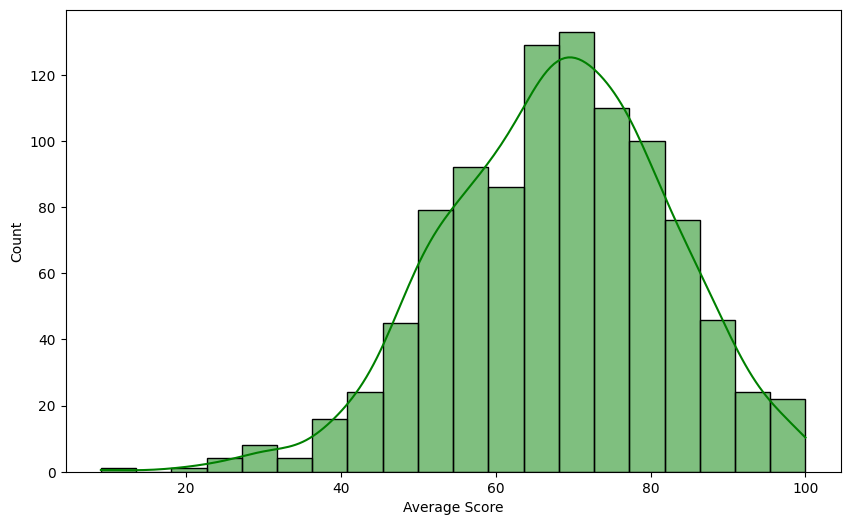

In [52]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='average_score', bins=20, kde=True, color='g')
plt.xlabel('Average Score')
plt.show()

From the distribution, we can see that most students got average score across all tests around 70-75%.

#### 4.2) Visualise average score distribution by Gender

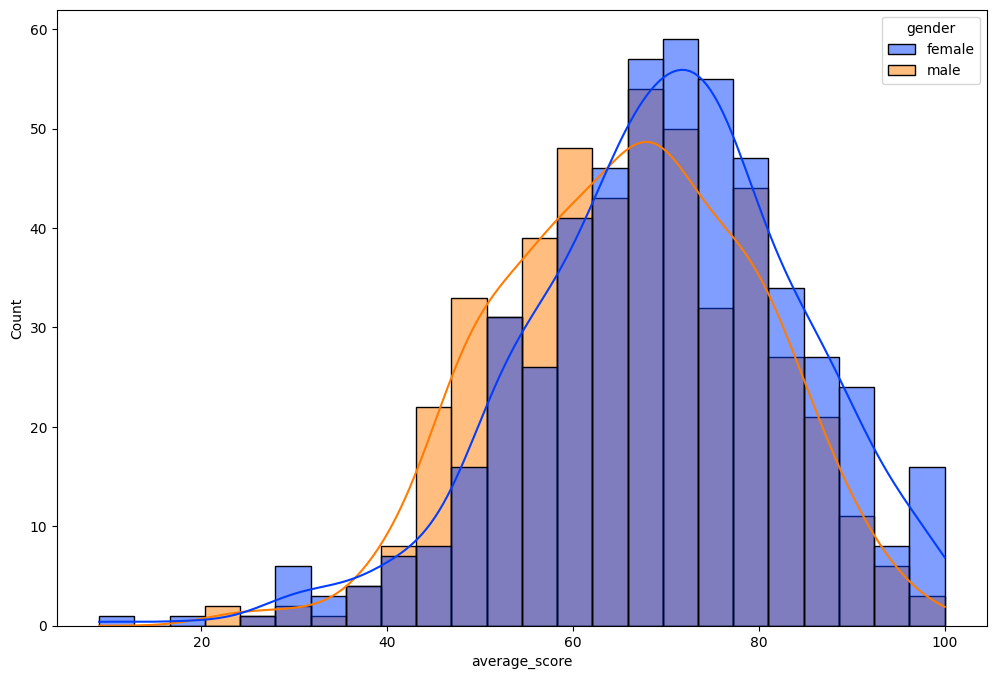

In [51]:
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='average_score', hue='gender', kde=True, palette='bright')
plt.show()

From the distribution plot, we see that female students tend to perform better in the tests overall than male students. 

#### 4.3) Visualising impact of lunch on average score for all students and then further split by gender

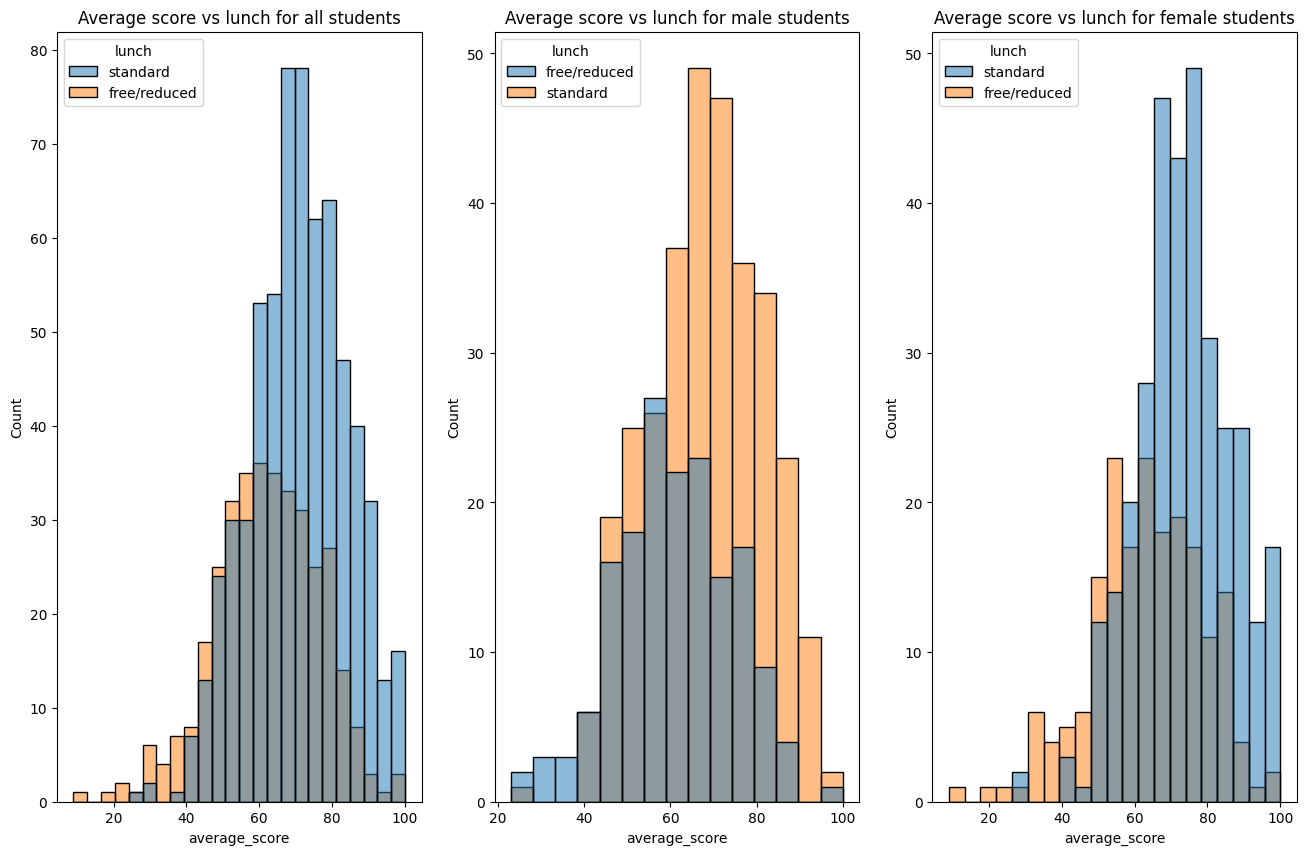

In [58]:
plt.subplots(1,3,figsize=(16,10))
plt.subplot(131)
sns.histplot(data=df, x='average_score', hue='lunch')
plt.title("Average score vs lunch for all students")

plt.subplot(132)
sns.histplot(data=df[df['gender']=='male'], x='average_score', hue='lunch')
plt.title("Average score vs lunch for male students")

plt.subplot(133)
sns.histplot(data=df[df['gender']=='female'], x='average_score', hue='lunch')
plt.title("Average score vs lunch for female students")

plt.show()

It seems that students who ate standard lunch rather than free/reduced lunch before the tests performed significantly better on average, regardless if the student was male or female.

#### 4.4) Visualising impact of parental level of education on student average scores

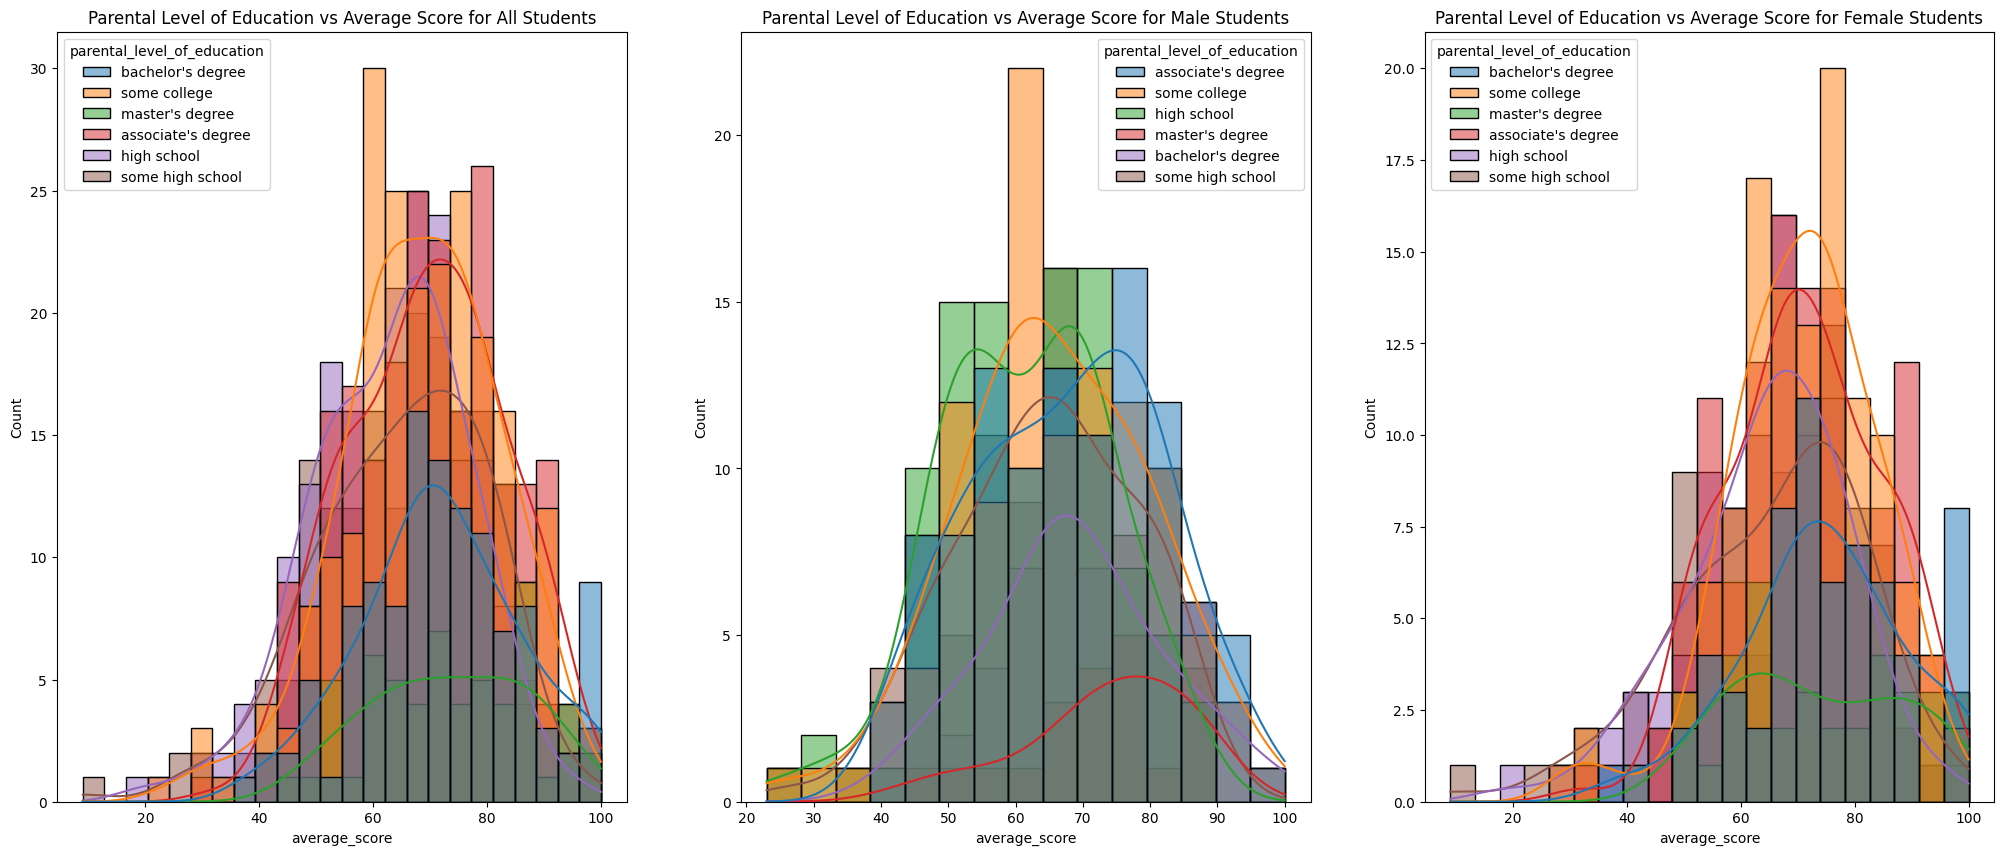

In [64]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.title('Parental Level of Education vs Average Score for All Students')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.title('Parental Level of Education vs Average Score for Male Students')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.title('Parental Level of Education vs Average Score for Female Students')
plt.show()

In general parent's level of education doesn't help students perform well in exam.

2nd plot shows male students with parents who have associates degree or masters degree, tend to perform better in exams.

3rd plot we can see there is no effect of parent's education on female students.

#### 4.5) Visualising Student Average Scores Based on Race/Ethnicity Groups

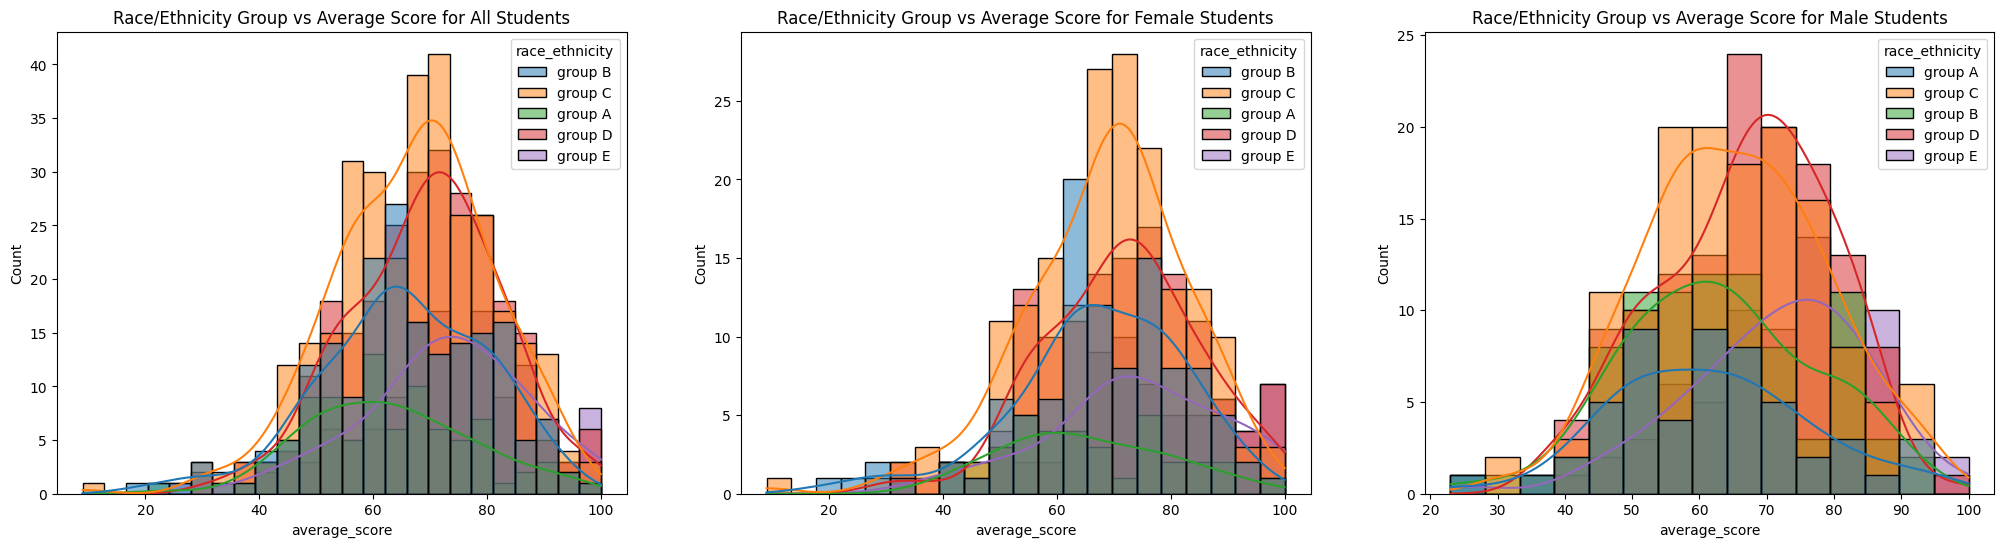

In [66]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.title('Race/Ethnicity Group vs Average Score for All Students')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.title('Race/Ethnicity Group vs Average Score for Female Students')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.title('Race/Ethnicity Group vs Average Score for Male Students')
plt.show()

From the plots above, we see that students in race/ethnicity groups A and B tend to perform poorly with respect to the other groups.
We also see that both Group A and B students perform poorly regardless of the student's gender

#### 4.6) Maximum Score of Students in the Three Subjects

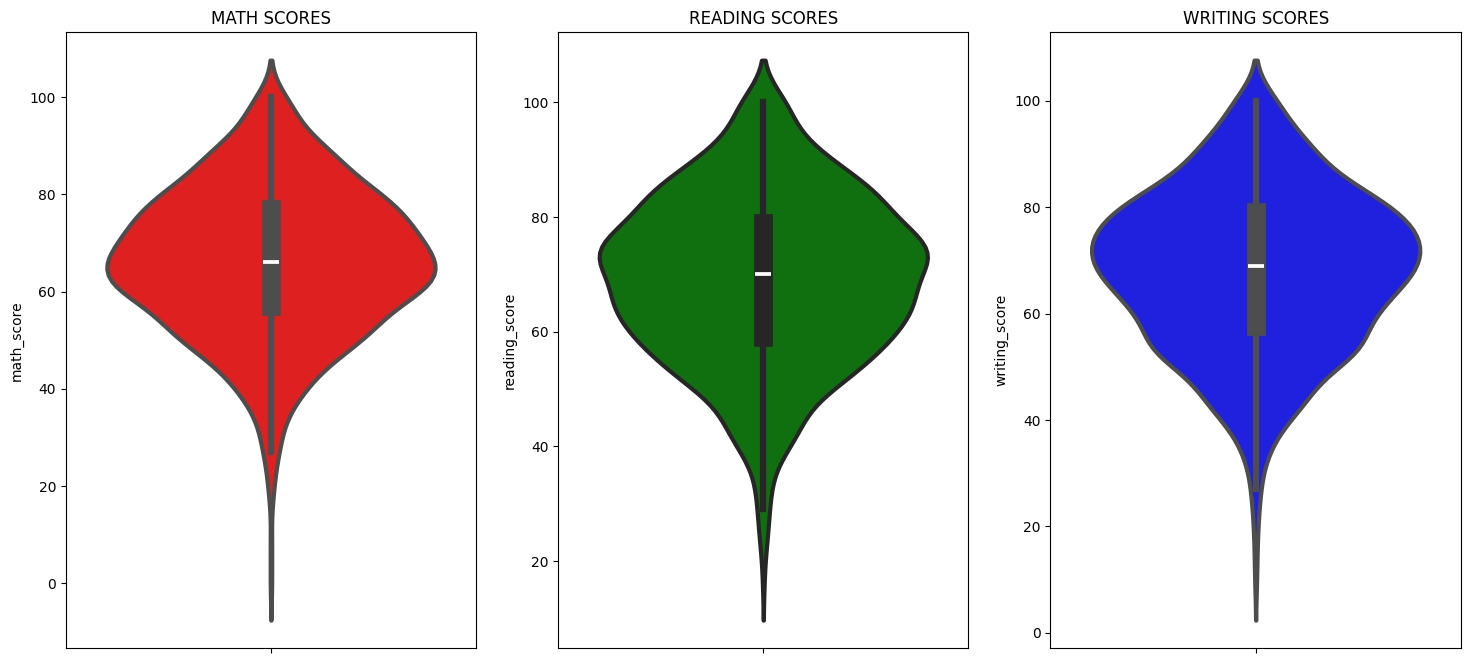

In [69]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### 4.6) Multivariate Analysis using Pie Charts


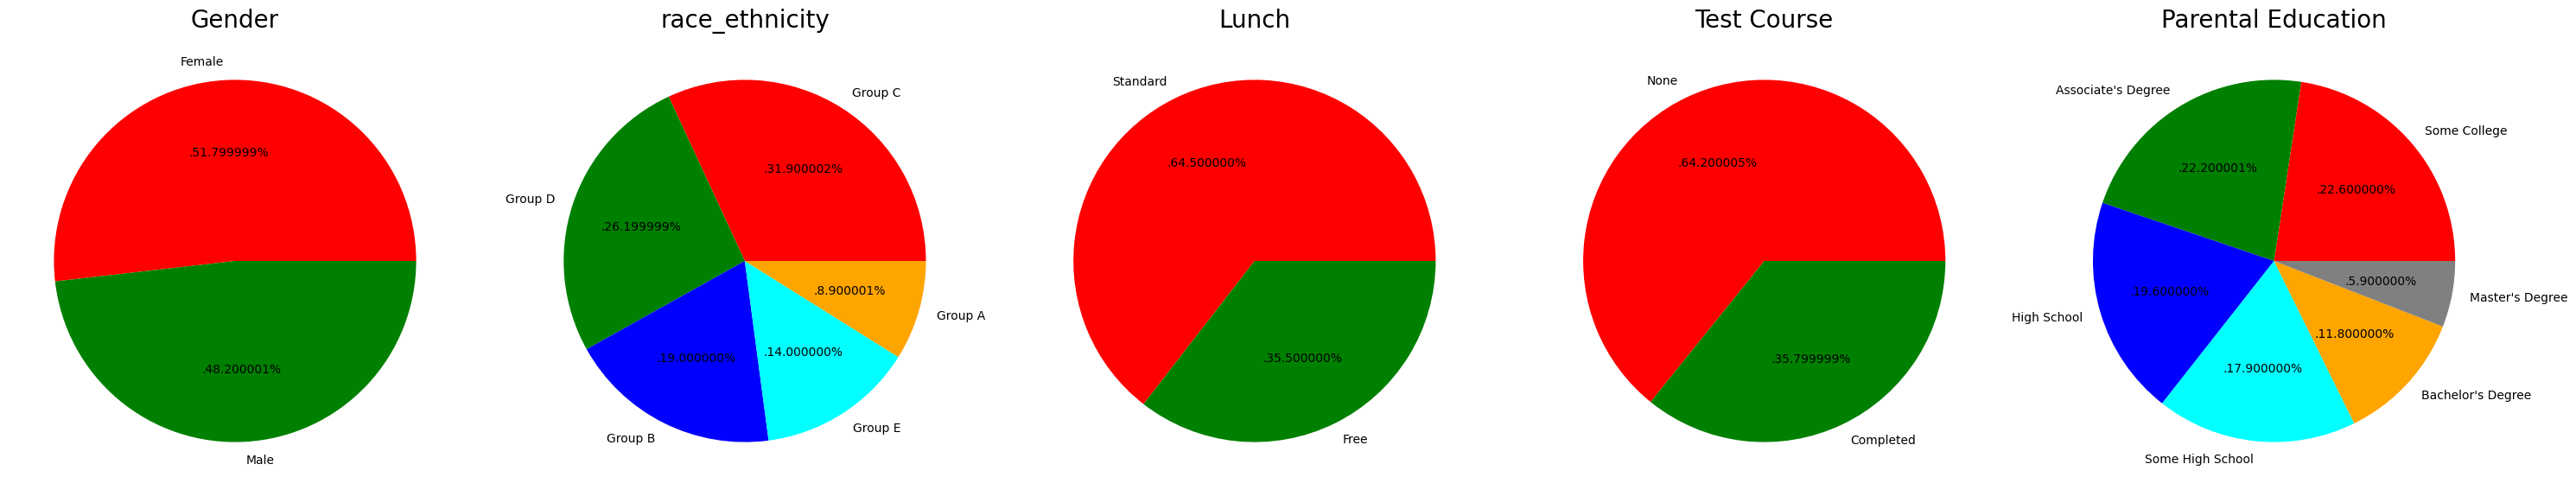

In [68]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('race_ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

From the above pie charts we can see that:

- Number of Male and Female students is almost equal

- Number students are greatest in Group C

- Number of students who have standard lunch are greater

- Number of students who have not enrolled in any test preparation course is greater

- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"